## Creazione di grafo dei settori/blocchi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

Lettura del file excel/csv esportato da NEST

In [2]:
airblock = pd.read_excel("ENV_1601_408Europe.xlsx", sheet_name="Airblock" )
airblock.columns=["ID", "Latitude", "Longitude"]
airblock.head()

,ID,Latitude,Longitude
0,000EG,NaN,NaN
1,NaN,N570000,W0150000
2,NaN,N570000,W0144914
3,NaN,N570000,W0144100
4,NaN,N570000,W0143355


I blocchi sono memorizzati attraversole coordinate geografiche (lat, lon) dei loro vertici --> il dataset ha un formato scomodo per essere elaborato --> vorrei ottenere una lista di vertici per ogni blocco

In [3]:
idBlocks = []
coordinate = []
j = -1
for i in range(0,len(airblock)):
    if str(airblock.ID[i]) != "nan":
        idBlocks.append(str(airblock.ID[i]))
        coordinate.append([])
        j = j + 1
    else :
        coordinate[j].append((airblock.Latitude[i], airblock.Longitude[i]))

In [4]:
def cmpCoord(cA, cB):
    return (cA[0] == cB[0]) and (cA[1] == cB[1])

In [5]:
def adiacenza(i,j):
    for k in range(0, (len(coordinate[i]) - 1)):
        for l in range(0, (len(coordinate[j]) - 1)):
            esito = ( cmpCoord(coordinate[i][k],coordinate[j][l]) and cmpCoord(coordinate[i][k+1],coordinate[j][l+1]) ) or ( cmpCoord(coordinate[i][k],coordinate[j][l+1]) and cmpCoord(coordinate[i][k+1],coordinate[j][l]) )
            if esito: return esito
    return False

In [6]:
n = len(idBlocks)
mAd = [ [0] * n for _ in range(n)]

In [7]:
for i in range(0, len(coordinate)):#iterazioni su blocco
    for j in range((i+1), len(coordinate)):
        if adiacenza(i,j):
            mAd[i][j] = mAd[i][j] + 1
            mAd[j][i] = mAd[j][i] + 1

In [8]:
mAdd = np.asmatrix(mAd)
dfma = pd.DataFrame(mAdd, index = idBlocks, columns = idBlocks)

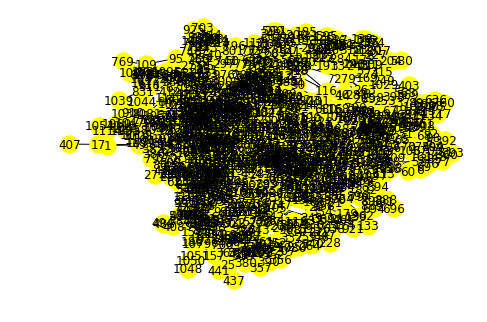

In [9]:
rows, cols = np.where(mAdd == 1)
edges = zip(rows.tolist(), cols.tolist())
gr = nx.Graph()
gr.add_edges_from(edges)
nx.draw(gr, node_size=300, node_color='yellow', with_labels=True)
plt.show()